# Data Analysis

## Importing the Cleaned Data Frames

In [357]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
%matplotlib inline
import plotly.graph_objects as go

We can use another notebook's data by switching to the same kernel. This will allow us to essentially share data between the two.

In [358]:
# Since we're using the same kernel as the other notebook, we're able to use the same dataframe names
# Inflation rate per year
inflation_df.head(2)

,Annual
Year,
1980,12.4
1981,10.4


In [359]:
# Mortgage rate per year
mort_avg_df.head(2)

,MORTGAGE30US
Year,
1971,7.541750
1972,7.383269


In [360]:
# Median Household Income per year
median_income_df.head(2)

,MEHOINUSA646N
Year,
1984,22420
1985,23620


In [361]:
# Median House Price per year
median_house_df.head(2)

,MSPUS
Year,
1963,18050.0
1964,18925.0


In [362]:
# U.S. National Debt per year
us_debt_df.head(2)

,Debt Outstanding Amount
Year,
2023,3.316733e+13
2022,3.092891e+13


In [363]:
# Price for a Pound of Chicken per year
chicken_df.head(2)

,Average Chicken Price per Pound
Year,
1980,0.709
1981,0.732


In [364]:
# Price for a Pound of Coffee per year
coffee_df.head(2)

,Average Coffee Price
Year,
1980,3.142
1981,2.527


In [365]:
# Price of Electricity per PWH per year
electricity_df.head(2)

,Average Electricity Price
Year,
1980,0.060
1981,0.069


In [366]:
# Price of Gasoline per gallon per year
gasoline_df.head(2)

,Average Gasoline Price
Year,
1980,1.221
1981,1.353


In [367]:
# Price for a Pound of White Bread per year
bread_df.head(2)

,Average Bread Price
Year,
1980,0.509
1981,0.525


We checked for a successful kernel switch and now we'll plot the data.

## Creating  Plot Objects

### Grocery Price Trend: Chicken, Coffee, Bread

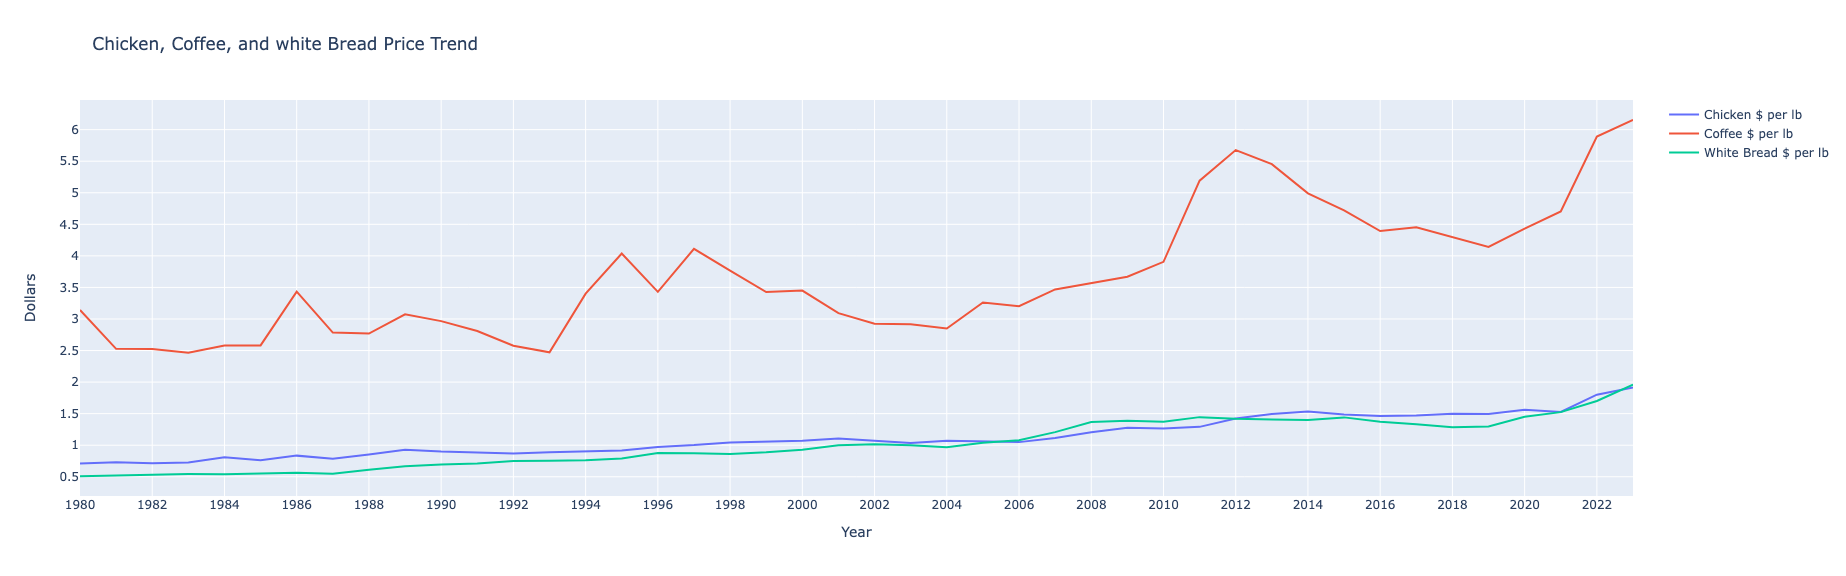

In [383]:
# Using plotly.graph_objects, we'll plot the price trend for basic goods.
grocery_plot = go.Figure()

# Adding trace (lines) with our dataframes
# Adding Chicken dataframe
grocery_plot.add_trace(
    go.Scatter(
        x=chicken_df.index, 
        y=chicken_df['Average Chicken Price per Pound'], 
        mode='lines', 
        name='Chicken $ per lb'
    )
)
# Addding Coffee dataframe
grocery_plot.add_trace(
    go.Scatter(
        x=coffee_df.index, 
        y=coffee_df['Average Coffee Price'], 
        mode='lines', 
        name='Coffee $ per lb'
    )
)
# Adding Bread dataframe
grocery_plot.add_trace(
    go.Scatter(
        x=bread_df.index, 
        y=bread_df['Average Bread Price'], 
        mode='lines', 
        name='White Bread $ per lb'
    )
)
# Updating the layout with desired parameters
grocery_plot.update_layout(width=1024, height = 576, title='Chicken, Coffee, and white Bread Price Trend', xaxis_title='Year', yaxis_title='Dollars')
grocery_plot.update_xaxes(dtick=2, tickmode='linear')
grocery_plot.update_yaxes(dtick=0.5, tickmode='linear')

grocery_plot.show()

#### Grocery Price Percent Change

In [384]:
# Chicken price percent change
value_1980 = chicken_df.loc[1980, 'Average Chicken Price per Pound']
value_2023 = chicken_df.loc[2023, 'Average Chicken Price per Pound']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

169.95768688293373

In [388]:
# Coffee price percent change
value_1980 = coffee_df.loc[1980, 'Average Coffee Price']
value_2023 = coffee_df.loc[2023, 'Average Coffee Price']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

95.92616168045829

In [195]:
# Bread price percent change
value_1980 = bread_df.loc[1980, 'Average Bread Price']
value_2023 = bread_df.loc[2023, 'Average Bread Price']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

285.0687622789784

From 1980 to 2023, the price for:
- A pound of Chicken **increased** by **170%**
- A pound of Coffee **increased** by **96%**
- A pound of White Bread **increased** by **285%**

### Utilities and Transportation Price Trend

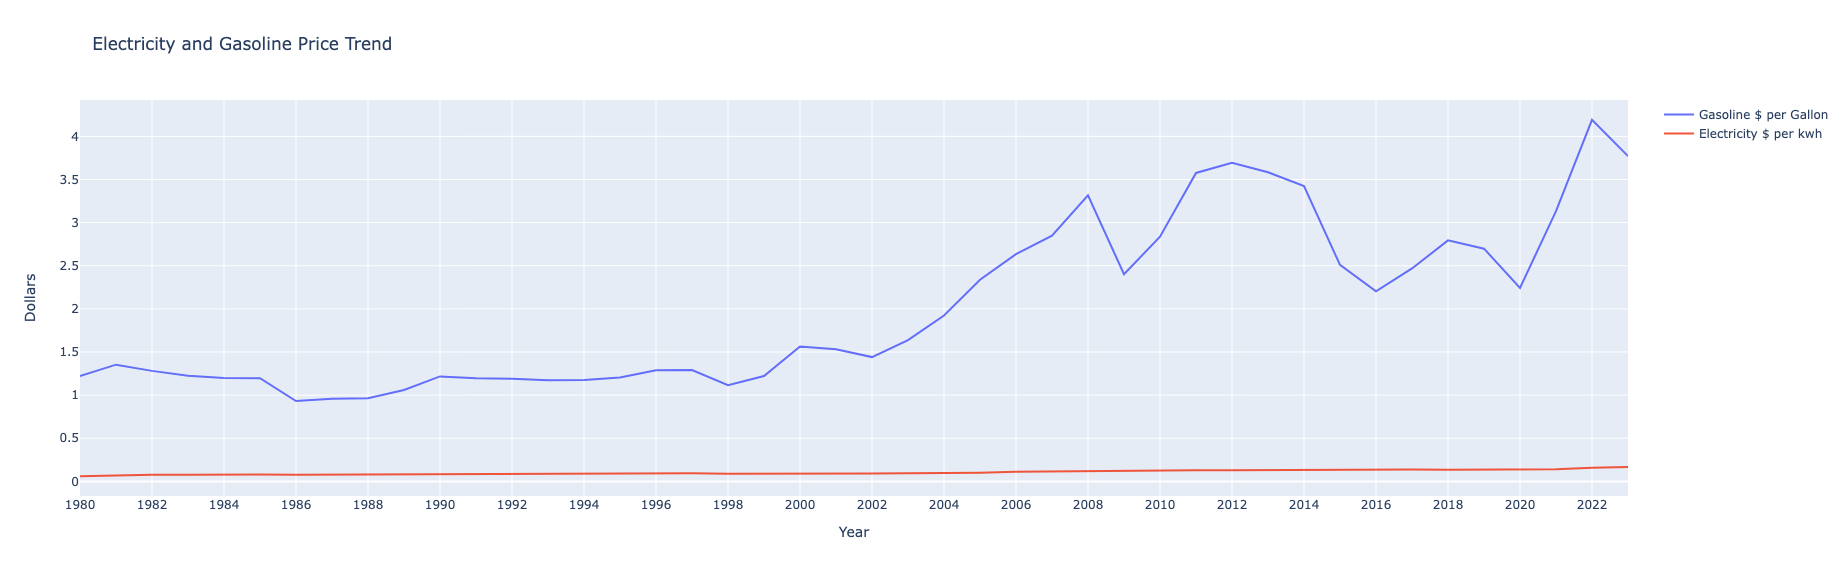

In [395]:
energy_plot = go.Figure()

# Adding Gasoline Dataframe
energy_plot.add_trace(go.Scatter(x=gasoline_df.index, y=gasoline_df['Average Gasoline Price'], mode='lines', name='Gasoline $ per Gallon'))
# Adding electricity Dataframe
energy_plot.add_trace(go.Scatter(x=electricity_df.index, y=electricity_df['Average Electricity Price'], mode='lines', name='Electricity $ per kwh'))

energy_plot.update_layout(width=1024, height = 576, title='Electricity and Gasoline Price Trend', xaxis_title='Year', yaxis_title='Dollars')
energy_plot.update_xaxes(dtick=2, tickmode='linear')
energy_plot.update_yaxes(dtick=0.5, tickmode='linear')

energy_plot.show()

#### Utilities and Transportation Price Percent Change

In [197]:
# Gasoline price percent change
value_1980 = gasoline_df.loc[1980, 'Average Gasoline Price']
value_2023 = gasoline_df.loc[2023, 'Average Gasoline Price']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

208.84520884520882

In [198]:
# Electricity price percent change
value_1980 = electricity_df.loc[1980, 'Average Electricity Price']
value_2023 = electricity_df.loc[2023, 'Average Electricity Price']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

180.00000000000003

From 1980 to 2023, the price for:
- A Gallon of Gasoline **increased** by **208%**
- A Kwh of electricity **increased** by **180%**

### General Cost of Living

In [391]:
# Mortgage Rate and Median House Cost 
house_prices_plot = median_house_df.hvplot.line(label='Median House Price', ylabel='Median House Price')
mortgage_rates_plot = mort_avg_df.hvplot.line(label='30-Year Mortgage Rate', ylabel='30-Year Mortgage Rate')

# Combine the two plots
combined_plot = house_prices_plot * mortgage_rates_plot

combined_plot = combined_plot.opts(
    title='Median House Price vs 30-Year Mortgage Rate',                          
    width=1024, 
    height = 576, 
    multi_y=True, 
    legend_position='bottom',
    yformatter='%.0f')

# Show the combined plot
combined_plot

:Overlay
   .Curve.Median_House_Price                   :Curve   [Year]   (MSPUS)
   .Curve.A_30_hyphen_minus_Year_Mortgage_Rate :Curve   [Year]   (MORTGAGE30US)

#### Percent Changes for House Price and 30yr Mortgage Rate

In [201]:
# Median House price percent change
value_1980 = median_house_df.loc[1980, 'MSPUS']
value_2023 = median_house_df.loc[2023, 'MSPUS']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

558.1724581724582

In [202]:
# Mortgage Rate percent change
value_1980 = mort_avg_df.loc[1980, 'MORTGAGE30US']
value_2023 = mort_avg_df.loc[2023, 'MORTGAGE30US']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

-50.468100589149024

From 1980 to 2023, these changes were observed:
- The median house price **increased** by **558%**
- The rate for a 30-year mortgage **decreased** by **50%**

In [393]:
# Median Household Income and Inflation Rate
median_income_plot = median_income_df.hvplot.line(label='Median Household Income', ylabel='Median Household Income')
inflation_rate_plot = inflation_df.hvplot.line(label='Annual Inflation Rate', ylabel='Annual Inflation Rate')

# Combine the two plots
combined_plot_ii = median_income_plot * inflation_rate_plot

combined_plot_ii = combined_plot_ii.opts(
    title='Median Household Income vs Annual Inflation Rate',
    width=1024, 
    height=576, 
    multi_y=True, 
    legend_position='bottom'
)

combined_plot_ii

:Overlay
   .Curve.Median_Household_Income :Curve   [Year]   (MEHOINUSA646N)
   .Curve.Annual_Inflation_Rate   :Curve   [Year]   (Annual)

#### Percent Change for Median Household Income and Inflation Rate

In [204]:
# Median Household Income percent change
value_1980 = median_income_df.loc[1984, 'MEHOINUSA646N']
value_2023 = median_income_df.loc[2022, 'MEHOINUSA646N']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

232.64942016057094

In [205]:
# Inflation Rate percent change
value_1980 = inflation_df.loc[1980, 'Annual']
value_2023 = inflation_df.loc[2023, 'Annual']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

-61.29032258064516

From 1980 to 2023, these changes were observed:
- The median household income **increased** by **232%**
- The annual rate of inflation **decreased** by **61%**

#### Plot

In [396]:
# Median Household Income and Median House Price 
combine_plot_pi = median_income_plot * house_prices_plot
combine_plot_pi = combine_plot_pi.opts(
    title='Median Household Income vs Median House Price',
    width=1024, 
    height=576, 
    legend_position='bottom', 
    yformatter='%.0f')
combine_plot_pi

:Overlay
   .Curve.Median_Household_Income :Curve   [Year]   (MEHOINUSA646N)
   .Curve.Median_House_Price      :Curve   [Year]   (MSPUS)

#### Percent Change for Median Household Income and Median House Price

In [397]:
# Median Household Income percent change
value_1980 = median_income_df.loc[1984, 'MEHOINUSA646N']
value_2023 = median_income_df.loc[2022, 'MEHOINUSA646N']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

232.64942016057094

In [398]:
# Median House price percent change
value_1980 = median_house_df.loc[1980, 'MSPUS']
value_2023 = median_house_df.loc[2023, 'MSPUS']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

558.1724581724582

From Around 1980 to 2023, these changes were observed:
- The median household income **increased** by **232%**
- The median house price **increased** by **558%**

The cost of a house greatly outpaces the median income of an American household.

#### Plot

In [400]:
# Annual Inflation Rate and Mortgage Rate
combined_plot_mi = inflation_rate_plot * mortgage_rates_plot
combined_plot_mi = combined_plot_mi.opts(
    title='Annual Inflation Rate vs 30-Year Mortgage Rate', 
    ylabel='Annual Average Rate',
    width=1024,
    height=576,
    legend_position='bottom'
)
combined_plot_mi

:Overlay
   .Curve.Annual_Inflation_Rate                :Curve   [Year]   (Annual)
   .Curve.A_30_hyphen_minus_Year_Mortgage_Rate :Curve   [Year]   (MORTGAGE30US)

#### Percent Change for Inflation and Mortgage Rate

In [401]:
# Inflation Rate percent change
value_1980 = inflation_df.loc[1980, 'Annual']
value_2023 = inflation_df.loc[2023, 'Annual']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

-61.29032258064516

In [402]:
# Mortgage Rate percent change
value_1980 = mort_avg_df.loc[1980, 'MORTGAGE30US']
value_2023 = mort_avg_df.loc[2023, 'MORTGAGE30US']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

-50.468100589149024

From 1980 to 2023, these changes were observed:
- The annual inflation rate **decreased** by **61%**
- The rate for a 30-year mortgage **decreased** by **50%**

#### Plot

In [410]:
# US Debt and Annual Inflation Rate
# Plot for US National Debt
usdebt_plot = us_debt_df.hvplot.line(label='US Debt', ylabel='US Debt (Ten Trillions)') 

# Combine the two plots
combined_plot_di = inflation_rate_plot * usdebt_plot 

combined_plot_di = combined_plot_di.opts(title='US National Debt vs Annual Inflation Rate', width=1024, height=576, multi_y=True, legend_position='top')

combined_plot_di

:Overlay
   .Curve.Annual_Inflation_Rate :Curve   [Year]   (Annual)
   .Curve.US_Debt               :Curve   [Year]   (Debt Outstanding Amount)

#### Percent Change for US National Debt and Annual Inflation Rate

In [213]:
# National debt percent change
value_1980 = us_debt_df.loc[1980, 'Debt Outstanding Amount']
value_2023 = us_debt_df.loc[2023, 'Debt Outstanding Amount']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

3553.9933353299334

In [214]:
# Inflation Rate percent change
value_1980 = inflation_df.loc[1980, 'Annual']
value_2023 = inflation_df.loc[2023, 'Annual']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

-61.29032258064516

From 1980 to 2023, these changes were observed:
- The national debt **increased** by **3554%**. We're currently at around 34 trillion dollars.
- The annual inflation rate **decreased** by **61%**

#### Plot

In [411]:
# US Debt and Median Household Income
combined_plot_dmi = usdebt_plot * median_income_plot
combined_plot_dmi = combined_plot_dmi.opts(
    title='National US Debt vs Median Household Income', 
    width=1024,
    height=576,
    legend_position='bottom',
    multi_y=True
)
combined_plot_dmi

:Overlay
   .Curve.US_Debt                 :Curve   [Year]   (Debt Outstanding Amount)
   .Curve.Median_Household_Income :Curve   [Year]   (MEHOINUSA646N)

In [412]:
# National debt percent change
value_1980 = us_debt_df.loc[1980, 'Debt Outstanding Amount']
value_2023 = us_debt_df.loc[2023, 'Debt Outstanding Amount']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

3553.9933353299334

In [413]:
# Median Household Income percent change
value_1980 = median_income_df.loc[1984, 'MEHOINUSA646N']
value_2023 = median_income_df.loc[2022, 'MEHOINUSA646N']

percent_change = ((value_2023 - value_1980) / value_1980) * 100
percent_change

232.64942016057094

From Around 1980 to 2023, these changes were observed:
- The national debt **increased** by **3554%**. We're currently at around 34 trillion dollars.
- The median household income **increased** by **232%**

With these numbers, it's safe to say that the cost of living has been increasing and is still on an upward trend.